

# Animations of gradient descent: Multiple Linear Regression


In [1]:
# import libraries
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import celluloid
from celluloid import Camera
from matplotlib import cm
from matplotlib import gridspec

# define (Multi-)linear regression model:
class LinearRegression(object): 
    def __init__(self,x,y, lr=0.01):
        self.lr=lr
        self.w=np.ones((1, x.shape[1])).T*3 #set starting weight(s) to 3.
        self.b=np.ones((1, y.shape[1]))*(-1)# set starting bias to -1.
        
    def cost(self,x,y):     
        pred = x@self.w+self.b # predicted y-values
        e=y-pred    # error term
        return np.mean(e**2)  # mean squared error

    def step(self, x,y): # update parameters
        pred = x@self.w+self.b
        e=y-pred
        # update weight matrix:
        self.w = (self.w.T-self.lr*(np.mean(e*(-2*x), axis=0))).T 
        # update bias: 
        self.b = self.b - self.lr*(np.mean(e*(-2),axis=0)) 
        
    def fit(self, x,y, numberOfEpochs=1000000):
        # create arrays to store weights, biases, costs and cl-values in:
        self.AllWeights= np.zeros((numberOfEpochs, x.shape[1])) 
        self.AllBiases= np.zeros(numberOfEpochs)
        self.AllCosts= np.zeros(numberOfEpochs)
        self.cl= np.zeros((numberOfEpochs,len(x))) # cl: (predicted) points for connection lines!
       
        
        for step in range(numberOfEpochs): 
            # for each step of gradient descent assign ...
            # ... new parameter value to respective array element:
            self.AllWeights[step]=self.w.T   
            self.AllBiases[step]=self.b
            self.AllCosts[step]=self.cost(x,y)
            self.cl[step]=(self.predict(x)).T.flatten() # y-values predicted by model 
            self.step(x,y) # update parameters

    def predict(self, x):
        return (x @ self.w + self.b) # return predicted values    

In [2]:
x_train = np.array([ # two independent variables
    [1,-2],
    [2,1],
    [4,1],
    [5,-3],
    [6,4],
    [7,5]
])

y_train = np.array([ 
    [14],
    [-12],
    [-31],
    [-21],
    [-51],
    [-37]
])

model=LinearRegression(x_train,y_train, lr=0.001) # set learning rate
model.fit(x_train,y_train, numberOfEpochs=100000) # set number of epochs

# Stored parameter values:
w0=model.AllWeights.T[0]
w1=model.AllWeights.T[1]
b= model.AllBiases
c=model.AllCosts
cl=model.cl

print("Final weights: "+ str(model.w)) # print final model parameters
print("Final bias: "+ str(model.b))
print("Final costs: " + str(model.cost(x_train,y_train)))

Final weights: [[-6.75922888]
 [-2.07075472]]
Final bias: [[7.23420837]]
Final costs: 75.63518594476348


In [3]:
# cross-check results with sklearn's linear regression model:
import sklearn
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[[-6.75922888 -2.07075472]]
[7.23420837]


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


w0: -6.753784163198132
w1: -2.0728519786367015
y-intercept: 7.209904544826773
costs: 75.6352814315814


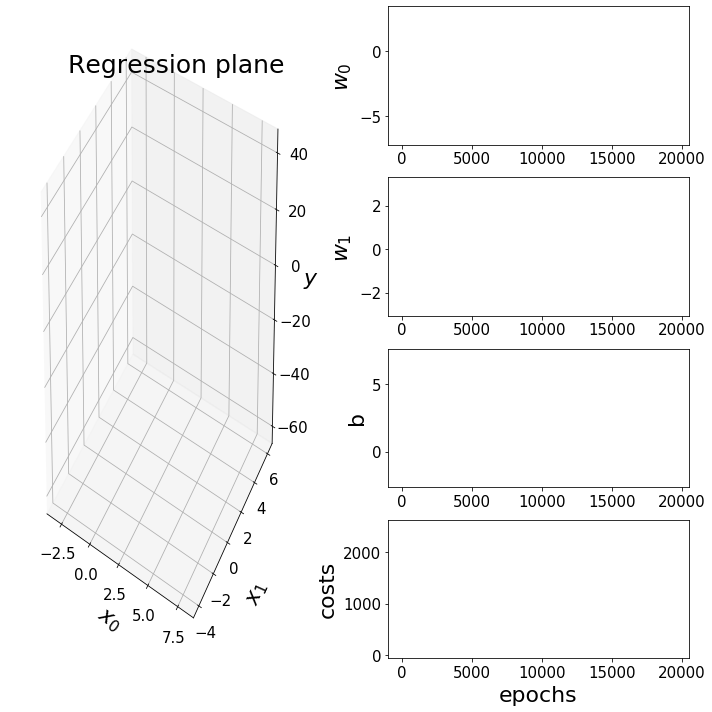

In [4]:
def pred_meshgrid(x,w,b):  # predicts Y-values for regression plane spanned by x0s and x1s
        p=x @ w.T + b   
        return p
    
x0s = np.linspace(-3,8, 35) # set range of values for plane 
x1s = np.linspace(-4, 6, 35)
M1, M2 = np.meshgrid(x0s, x1s) #  set up first meshgrid in order to create regression plane

# Define which epochs/data points to plot:
a1 = np.arange(0,50,1).tolist()
a2=np.arange(50,100,5).tolist()
a3=np.arange(100,1000,50).tolist()
a4=np.arange(1000,20000,500).tolist()
points_ = a1+a2+a3+a4

# Create first animation (regression plane & parameter values): 
fig = plt.figure(figsize=(10,10)) # create figure
fig.suptitle('Regression plane', fontsize=25,x=0.25, y=0.92) # title of figure
labelsize_=15 # tick label font size 
fontsize_=22 # axis label font size 
labelpad_=5 # label pad

ax0=fig.add_subplot(1, 2, 1, projection='3d') # add supblots
ax0.tick_params(axis='both', which='major', labelsize=labelsize_) # set tick label font size
ax0.tick_params(axis='z', pad=15, which='major', labelsize=labelsize_) # set axis padding
ax0.set_xlabel(r'$x_0$', fontsize=fontsize_, labelpad=7) # set axis labels and axis label font size
ax0.set_ylabel(r'$x_1$', fontsize=fontsize_, labelpad=19)
ax0.set_zlabel(r'$y$', fontsize=fontsize_, labelpad=19)

ax1=fig.add_subplot(4, 2, 2) 
ax1.set_ylabel(r'$w_0$', fontsize=fontsize_, labelpad=labelpad_)
ax1.tick_params(axis='both', which='major', labelsize=labelsize_) # set tick label font size

ax2=fig.add_subplot(4, 2, 4, sharex=ax1) # plots of parameter values share x-axis
ax2.set_ylabel(r'$w_1$', fontsize=fontsize_, labelpad=labelpad_)
ax2.tick_params(axis='both', which='major', labelsize=labelsize_)

ax3=fig.add_subplot(4, 2, 6, sharex=ax1)
ax3.set_ylabel("b", fontsize=fontsize_, labelpad=labelpad_)
ax3.tick_params(axis='both', which='major', labelsize=labelsize_)

ax4=fig.add_subplot(4, 2, 8, sharex=ax1) 
ax4.set_ylabel("costs", fontsize=fontsize_, labelpad=labelpad_)
ax4.tick_params(axis='both', which='major', labelsize=labelsize_)
ax4.set_xlabel("epochs", fontsize=fontsize_, labelpad=5)

camera = Camera(fig) # create camera
for i in points_:   
    
    w=np.array([[w0[i],w1[i]]]) # weights with respect to epoch
    b_= b[i]     # b with respect to epoch
    cl_=cl[i]   # predicted y-values with respect to epoch
    
    ax0.legend([f'epochs: {i}'], loc=(0, 0.8), fontsize=15) # set legend position
    zs = np.array([pred_meshgrid(np.array([[wp0,wp1]]),w, np.array([[b_]])) 
                   for wp0, wp1 in zip(np.ravel(M1), np.ravel(M2))])
    Z = zs.reshape(M1.shape)# z-values of regression plane
    ax0.plot_surface(M1, M2, Z, rstride=1, cstride=1, # plot regression plane
                     color='blue', alpha=0.25,cmap=cm.plasma, label=str(i),
                    antialiased=False)
    ax0.scatter(x_train.T[0],x_train.T[1] ,   y_train,  # plot training data points
                marker="x", s=12**2, color="black")
    
    for j in range(6):    
        # plot connecting lines (between predicted y-values and training data points):
        x,y,z = [x_train[j][0],x_train[j][0]],[x_train[j][1],x_train[j][1]],[float(y_train[j]),cl_[j]]
        ax0.scatter(x,y,z, color='black',s=0.5)
        ax0.plot(x,y,z, color='black', linewidth=1.5,linestyle='dashed')
    
    ax1.plot(np.array(w0[0:i]).flatten(), color='darkblue',
             linestyle="dashed", alpha=0.5) # plot values of w0
    ax2.plot(w1[0:i].flatten(), color='blueviolet',
             linestyle="dashed", alpha=0.5) # plot values of w1
    ax3.plot(np.array(b[0:i]).flatten(), color='red',
             linestyle="dashed", alpha=0.5) # plot values of b
    ax4.plot((np.array(c[0:i]).flatten()),color='black',
             linestyle="dashed") # plot values of costs
    plt.tight_layout()
    camera.snap()  # take snapshot after each frame/iteration
    
animation = camera.animate(interval = 5,
                          repeat = True, repeat_delay = 0)  # create animation 
#animation.save('MultiLinReg_1.gif', writer = 'imagemagick')  # save animation 

# Print final parameters and costs portrayed in animations 
#print("w0: " + str(w0[i])) # -6.759228876127614
#print("w1: " + str(w1[i])) # -2.0707547169812446
#print("y-intercept: " + str(b[i])) # 7.234208367512638
#print("costs: " + str(c[i])) # 75.63518594476345

## Fixed-intercept model:
With costs being the z-value, we can only plot two out of three parameters we fitted to our data. We are generally more interested in the weights rather than the bias term of our multiple linear regression model. 
To visualize how the costs steadily reduce with our fitted weights we have to set up a new linear regression model where the bias term b is "fixed". This can easily be done by setting our starting value for b to our chosen value b_fixed and inactivating/deleting the 'updating' term regarding "self.b". 

In [5]:
# set b to the y-intercept value we previously observed. 
b_fixed= float(model.b) 

# Define new model with fixed intercept:
class LinearRegression_fixed_b(object):  
    def __init__(self,x,y,b,lr=0.01):
        self.lr=lr
        self.b=np.array([[b]]) # set fixed(!) starting value for b
        self.w=np.ones((1, x.shape[1])).T   *3   # set starting weights to 3.
          
    def cost(self,x,y):     
        pred = x@self.w+self.b 
        e=y-pred    
        return np.mean(e**2)  

    def step(self, x,y):
        pred = x@self.w+self.b
        e=y-pred
        self.w = (self.w.T-self.lr*(np.mean(e*(-2*x), axis=0))).T 
           
    def fit(self, x,y, numberOfEpochs=1000000):
        self.AllWeights= np.zeros((numberOfEpochs, x.shape[1]))
        self.AllBiases= np.zeros(numberOfEpochs)
        self.AllCosts= np.zeros(numberOfEpochs)
        self.cl= np.zeros((numberOfEpochs,len(x)))
        
        for step in range(numberOfEpochs):
            self.AllWeights[step]=self.w.T
            self.AllCosts[step]=self.cost(x,y)
            self.cl[step]=(self.predict(x)).T.flatten()
            self.step(x,y)

    def predict(self, x):
        return (x @ self.w + self.b) 

        
model=LinearRegression_fixed_b(x_train,y_train,b_fixed, lr=0.001) # set learning rate
model.fit(x_train,y_train, numberOfEpochs=100000) # set number of epochs
    
w0=model.AllWeights.T[0]
w1=model.AllWeights.T[1]
c=model.AllCosts
cl=model.cl

print("Final weights (fixed-intercept model): "+ str(model.w))
print("Final bias (fixed-intercept model): "+ str(float(model.b)))
print("Final costs (fixed-intercept model): " + str(float(model.cost(x_train,y_train))))

Final weights (fixed-intercept model): [[-6.75922888]
 [-2.07075472]]
Final bias (fixed-intercept model): 7.234208367512638
Final costs (fixed-intercept model): 75.63518594476345


In [6]:
def cost_3d(x,y,w,b):   # returns costs for every pair of w0 and w1.
        pred = x@w.T+b              
        e=y-pred
        return np.mean(e**2)
        
# set range of values for w0 and w1:
n1s = np.linspace(-15, 5, 100) 
n2s = np.linspace(-15, 5, 100)
N1, N2 = np.meshgrid(n1s, n2s)# create 2nd meshgrid (--> costs with respect to weight values!)
zs_2 = np.array([cost_3d(x_train,y_train  # determine costs for each pair of w0/w1 and fixed b. 
                       ,np.array([[mp1,mp2]]), np.array([[b_fixed]]))  
               for mp1, mp2 in zip(np.ravel(N1), np.ravel(N2))])
Z_2 = zs_2.reshape(N1.shape) # z-values ('costs') of contour and surface plots

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


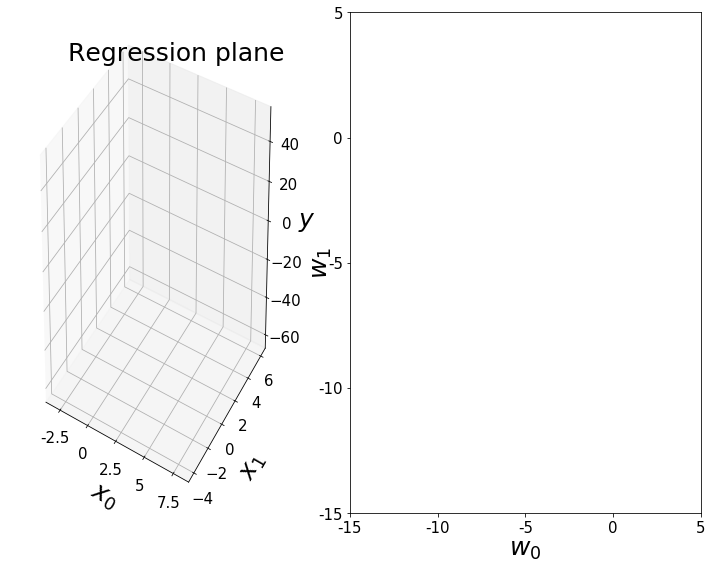

In [7]:
# Second Animation (Contour plot):

# define which epochs/points to plot: 
a1 = np.arange(0,50,1).tolist()
a2=np.arange(50,100,5).tolist()
a3=np.arange(100,400,25).tolist() # set upper limit of epochs to 400 
points_=a1+a2+a3

levels = np.array([80,150,300,600,2000])  # set levels for contour plot
labelsize_=15 # set tick label font size 

fig = plt.figure(figsize=(10,8)) # create figure
fig.suptitle('Regression plane', fontsize=25,x=0.25, y=0.92)
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1.2 ]) # set width ratio of subplots

ax0=fig.add_subplot(gs[0], projection="3d") # configure plots as described above ...
ax0.tick_params(axis='both', which='major', labelsize=labelsize_)
ax0.set_xlabel(r'$x_0$', fontsize=25, labelpad=9)
ax0.set_xticks([-2.5,0,2.5,5,7.5]) 
ax0.set_xticklabels(["-2.5","0","2.5","5","7.5"], fontsize=labelsize_)
ax0.set_ylabel(r'$x_1$', fontsize=25, labelpad=15)
ax0.set_zlabel(r'$y$', fontsize=25, labelpad=16)
ax0.tick_params(axis='both', which='major', labelsize=labelsize_) 
# manually set tick label distance from (z-)axis: 
ax0.tick_params(axis='z', pad=10, which='major', labelsize=labelsize_) 

ax1=fig.add_subplot(gs[1])
ax1.tick_params(axis='both', which='major', labelsize=labelsize_) 
ax1.set_xlabel(r'$w_0$', fontdict=None, labelpad=2, fontsize=25)
ax1.set_ylabel(r'$w_1$', fontdict=None, labelpad=-16, fontsize=25)
ax1.set_xticks([-15,-10,-5,0,5]) 
ax1.set_xticklabels(["-15","-10","-5","0","5"], fontsize=labelsize_)
ax1.set_yticks([-15,-10,-5,0,5]) 
ax1.set_yticklabels(["-15","-10","-5","0","5"], fontsize=labelsize_)


points_=a1+a2+a3
camera = Camera(fig)

for i in points_:
    
    w=np.array([[w0[i],w1[i]]])
    b_= b_fixed
    cl_=cl[i]
    
    ax0.legend([f'epochs: {i}'], loc=(0.1, 0.78), fontsize=15) # set legend position
    ax1.legend([f'costs: {np.round(c[i],1)}'], loc=(0.55, 0.03), fontsize=15)
    
    zs = np.array([pred_meshgrid(np.array([[wp0,wp1]]),w, np.array([[b_]])) 
                   for wp0, wp1 in zip(np.ravel(M1), np.ravel(M2))])
    Z = zs.reshape(M1.shape)
    
    ax0.plot_surface(M1, M2, Z, rstride=1, cstride=1,  alpha=0.25,cmap=cm.plasma, label=str(i),
                    antialiased=False) # "antialiased = False" --> 'striated' plane
    ax0.scatter(x_train.T[0],x_train.T[1] ,   y_train, marker="x", s=12**2, color="black")
    
    for j in range(6):    
        x,y,z = [x_train[j][0],x_train[j][0]],[x_train[j][1],x_train[j][1]],[float(y_train[j]),cl_[j]]
        ax0.scatter(x,y,z, color='black',s=0.5)
        ax0.plot(x,y,z, color='black', linewidth=1.5,linestyle='dashed')

    cp = ax1.contour(N1, N2, Z_2,levels, colors='black', # contour plot
                     linestyles='dashed', linewidths=1)
    plt.clabel(cp, inline=1,fmt='%1.1f', fontsize=15 )
    cp = plt.contourf(N1, N2, Z_2, alpha=0.85,cmap=cm.viridis) # filled contour plots 
    # plot weight coordinates with respect to epoch: 
    plt.scatter(w0[i],w1[i],marker='o', s=11**2, color='orange' ) 
    plt.plot(w0[0:i],w1[0:i], linestyle="dashed", color='orange' ) # plot trajectory
    plt.tight_layout()
    camera.snap()

animation = camera.animate(interval = 100,  # "interval": delay between frames in milliseconds.
                          repeat = False, repeat_delay = 0)
animation.save('multilinreg_2.gif', writer = 'imagemagick') 

# Print final parameters and costs portrayed in (second) animation: 
#print("w0: " + str(w0[i])) # -6.759228876127614
#print("w1: " + str(w1[i])) # -2.0707547169812446
#print("costs: " + str(c[i])) # 75.63518594476345

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


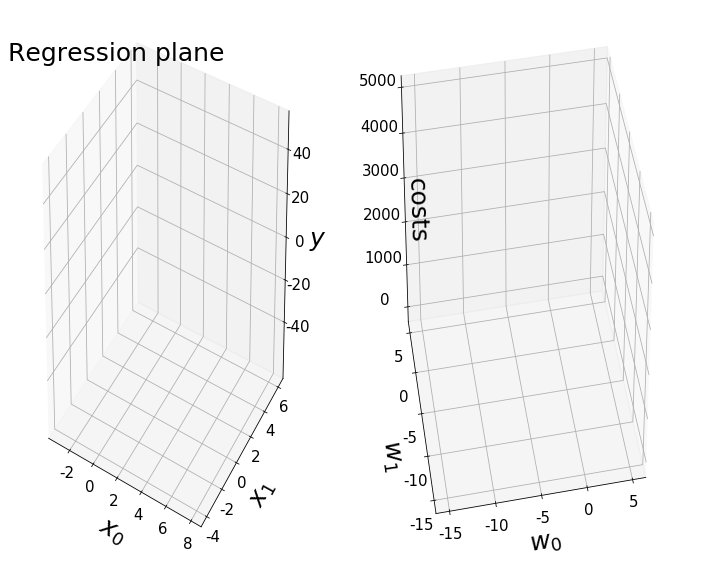

In [8]:
# Third Animation (surface plot):

labelsize_=14 # set tick label font size 
fontsize_=15 # set 

fig = plt.figure(figsize=(10,8)) # create figure
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1.2 ]) # set width ratios

ax0=fig.add_subplot(gs[0], projection="3d") # projection='3d'
ax0.set_title('Regression plane', fontsize=25,x=0.35, y=0.97) # set title
ax0.set_xlabel(r'$x_0$', fontsize=25, labelpad=6) # configure plots as described above ...
ax0.set_ylabel(r'$x_1$', fontsize=25, labelpad=8)
ax0.set_zlabel(r'$y$', fontsize=25, labelpad=10)
ax0.tick_params(axis='x', pad=0, which='major', labelsize=labelsize_)
ax0.tick_params(axis='y', pad=0, which='major', labelsize=labelsize_)
ax0.tick_params(axis='z', pad=5, which='major', labelsize=labelsize_)
ax0.set_xticks([-2,0,2,4,6,8]) # set ticks 
ax0.set_xticklabels(["-2","0","2","4","6","8"], fontsize=fontsize_) # set tick labels
ax0.set_yticks([-4,-2,0,2,4,6]) 
ax0.set_yticklabels(["-4","-2","0","2","4","6"], fontsize=fontsize_)
ax0.set_zticks([-40,-20,0,20,40]) 
ax0.set_zticklabels(["-40","-20","0","20","40"], fontsize=fontsize_)

ax1=fig.add_subplot(gs[1], projection="3d") # projection='3d'
ax1.view_init(elev=37., azim=-100) # set view
ax1.set_xlabel(r'$w_0$', fontdict=None, labelpad=5, fontsize=25)
ax1.set_ylabel(r'$w_1$', fontdict=None, labelpad=17, fontsize=25)
ax1.set_zlabel("costs", fontdict=None, labelpad=-33, fontsize=25)
ax1.tick_params(axis='x', pad=0, which='major', labelsize=labelsize_)
ax1.tick_params(axis='y', pad=7, which='major', labelsize=labelsize_)
ax1.tick_params(axis='z', pad=17, which='major', labelsize=labelsize_)
ax1.set_xticks([-15,-10,-5,0,5]) 
ax1.set_xticklabels(["-15","-10","-5","0","5"], fontsize=fontsize_)
ax1.set_yticks([-15,-10,-5,0,5]) 
ax1.set_yticklabels(["-15","-10","-5","0","5"], fontsize=fontsize_)
ax1.set_zticks([0,1000,2000,3000,4000,5000]) 
ax1.set_zticklabels(["0","1000","2000","3000","4000", "5000"], fontsize=fontsize_)

camera = Camera(fig)
for i in points_:
    
    w=np.array([[w0[i],w1[i]]])
    b_= b_fixed
    cl_=cl[i]
    
    ax0.legend([f'epochs: {i}'], loc=(0.05, 0.82), fontsize=15) # set legend position
    ax1.legend([f'costs: {np.round(c[i],1)}'], loc=(0.2, 0.8), fontsize=15)
    
    zs = np.array([pred_meshgrid(np.array([[wp0,wp1]]),w, np.array([[b_]])) 
                   for wp0, wp1 in zip(np.ravel(M1), np.ravel(M2))])
    Z = zs.reshape(M1.shape)
    ax0.plot_surface(M1, M2, Z, rstride=1, cstride=1, color='blue',
                     alpha=0.25,cmap=cm.plasma, label=str(i),
                     antialiased=False)
    ax0.scatter(x_train.T[0],x_train.T[1],y_train,
                marker="x", s=12**2, color="black")
    
    for j in range(6):    
        x,y,z = [x_train[j][0],x_train[j][0]],[x_train[j][1],x_train[j][1]],[float(y_train[j]),cl_[j]]
        ax0.scatter(x,y,z, color='black',s=0.5)
        ax0.plot(x,y,z, color='black', linewidth=1.5,linestyle='dashed')
        
    ax1.plot(w0[0:i],w1[0:i],c[0:i], linestyle="dashed", 
                color="black", label=str(i)) # plot trajectory
    ax1.plot_surface(N1, N2, Z_2, cmap='viridis',rstride=1, #surface plot
                    cstride=1,
                     antialiased=True, # "antialiased = True" --> 'smooth' surface
                     alpha=0.69) 
    ax1.scatter(w0[i],w1[i],c[i],marker='o', s=12**2,
               color="black", alpha=1.0 ) # scatter plot of costs with respect to epoch
        
    plt.tight_layout()
    camera.snap()

animation = camera.animate(interval = 100,
                          repeat = False, repeat_delay = 0)
animation.save('multilinreg_3.gif', writer = 'imagemagick') 

## Smaller version of surface plot (Medium featured image):

In [ ]:
labelsize_=12 # set tick label font size 
fontsize_=13 # set 

fig = plt.figure(figsize=(6.5,6.5)) # create figure
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1.2 ]) # set width ratios

ax0=fig.add_subplot(gs[0], projection="3d") # projection='3d'
ax0.set_title('Regression plane', fontsize=20,x=0.6, y=0.97) # set title
ax0.set_xlabel(r'$x_0$', fontsize=20, labelpad=3) # configure plots as described above ...
ax0.set_ylabel(r'$x_1$', fontsize=20, labelpad=14)
ax0.set_zlabel(r'$y$', fontsize=20, labelpad=11)
ax0.tick_params(axis='x', pad=0, which='major', labelsize=labelsize_)
ax0.tick_params(axis='y', pad=0, which='major', labelsize=labelsize_)
ax0.tick_params(axis='z', pad=8, which='major', labelsize=labelsize_)
ax0.set_xticks([-2,0,2,4,6,8]) # set ticks 
ax0.set_xticklabels(["-2","0","2","4","6","8"], fontsize=fontsize_) # set tick labels
ax0.set_yticks([-4,-2,0,2,4,6]) 
ax0.set_yticklabels(["-4","-2","0","2","4","6"], fontsize=fontsize_)
ax0.set_zticks([-40,-20,0,20,40]) 
ax0.set_zticklabels(["-40","-20","0","20","40"], fontsize=fontsize_)

ax1=fig.add_subplot(gs[1], projection="3d") # projection='3d'
ax1.view_init(elev=37., azim=-100) # set view
ax1.set_xlabel(r'$w_0$', fontdict=None, labelpad=-1, fontsize=20)
ax1.set_ylabel(r'$w_1$', fontdict=None, labelpad=17, fontsize=20)
ax1.set_zlabel("costs", fontdict=None, labelpad=-33, fontsize=20)
ax1.tick_params(axis='x', pad=0, which='major', labelsize=labelsize_)
ax1.tick_params(axis='y', pad=7, which='major', labelsize=labelsize_)
ax1.tick_params(axis='z', pad=17, which='major', labelsize=labelsize_)
ax1.set_xticks([-15,-10,-5,0,5]) 
ax1.set_xticklabels(["-15","-10","-5","0","5"], fontsize=fontsize_)
ax1.set_yticks([-15,-10,-5,0,5]) 
ax1.set_yticklabels(["-15","-10","-5","0","5"], fontsize=fontsize_)
ax1.set_zticks([0,1000,2000,3000,4000,5000]) 
ax1.set_zticklabels(["0","1000","2000","3000","4000", "5000"], fontsize=fontsize_)

camera = Camera(fig)


for i in points_:
    
    w=np.array([[w0[i],w1[i]]])
    b_= b_fixed
    cl_=cl[i]
    
    ax0.legend([f'epochs: {i}'], loc=(0.05, 0.82), fontsize=12) # set legend position
    ax1.legend([f'costs: {np.round(c[i],1)}'], loc=(0.15, 0.8), fontsize=12)
    
    zs = np.array([pred_meshgrid(np.array([[wp0,wp1]]),w, np.array([[b_]])) 
                   for wp0, wp1 in zip(np.ravel(M1), np.ravel(M2))])
    Z = zs.reshape(M1.shape)
    ax0.plot_surface(M1, M2, Z, rstride=1, cstride=1, color='blue',
                     alpha=0.25,cmap=cm.plasma, label=str(i),
                     antialiased=False)
    ax0.scatter(x_train.T[0],x_train.T[1],y_train,
                marker="x", s=12**2, color="black")
    
    for j in range(6):    
        x,y,z = [x_train[j][0],x_train[j][0]],[x_train[j][1],x_train[j][1]],[float(y_train[j]),cl_[j]]
        ax0.scatter(x,y,z, color='black',s=0.5)
        ax0.plot(x,y,z, color='black', linewidth=1.5,linestyle='dashed')
        
    ax1.plot(w0[0:i],w1[0:i],c[0:i], linestyle="dashed", 
                color="black", label=str(i)) # plot trajectory
    ax1.plot_surface(N1, N2, Z_2, cmap='viridis',rstride=1, #surface plot
                    cstride=1,
                     antialiased=True, # "antialiased = True" --> 'smooth' surface
                     alpha=0.69) 
    ax1.scatter(w0[i],w1[i],c[i],marker='o', s=12**2,
               color="black", alpha=1.0 ) # scatter plot of costs with respect to epoch
        
    plt.tight_layout()
    camera.snap()

animation = camera.animate(interval = 100,
                          repeat = False, repeat_delay = 0)
animation.save('multilinreg_3_small.gif', writer = 'imagemagick') 

# Cover photo:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


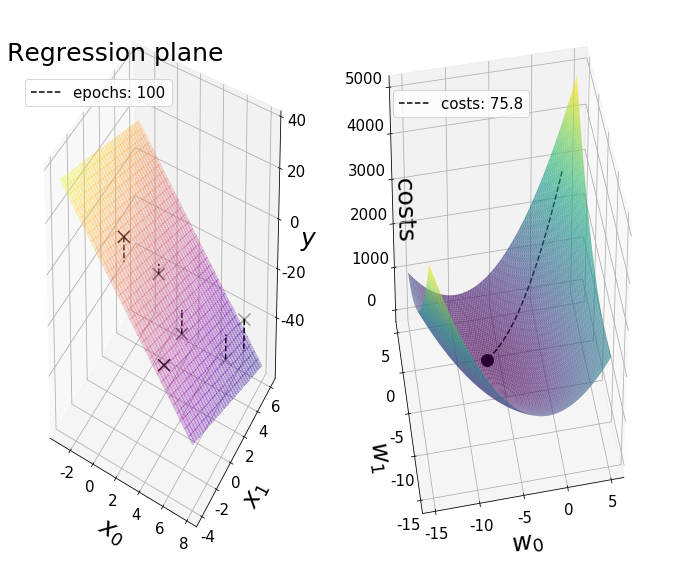

In [9]:
labelsize_=14 # set tick label font size 
fontsize_=15 # set 

fig = plt.figure(figsize=(10,8)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1.2 ]) 

ax0=fig.add_subplot(gs[0], projection="3d") # projection='3d'
ax0.set_title('Regression plane', fontsize=25,x=0.35, y=0.97) # configure plots as described above
ax0.set_xlabel(r'$x_0$', fontsize=25, labelpad=6)
ax0.set_ylabel(r'$x_1$', fontsize=25, labelpad=8)
ax0.set_zlabel(r'$y$', fontsize=25, labelpad=10)
ax0.tick_params(axis='x', pad=0, which='major', labelsize=labelsize_)
ax0.tick_params(axis='y', pad=0, which='major', labelsize=labelsize_)
ax0.tick_params(axis='z', pad=8, which='major', labelsize=labelsize_)
ax0.set_xticks([-2,0,2,4,6,8]) 
ax0.set_xticklabels(["-2","0","2","4","6","8"], fontsize=fontsize_)
ax0.set_yticks([-4,-2,0,2,4,6]) 
ax0.set_yticklabels(["-4","-2","0","2","4","6"], fontsize=fontsize_)
ax0.set_zticks([-40,-20,0,20,40]) 
ax0.set_zticklabels(["-40","-20","0","20","40"], fontsize=fontsize_)

ax1=fig.add_subplot(gs[1], projection="3d")
ax1.view_init(elev=37., azim=-100)
ax1.set_xlabel(r'$w_0$', fontdict=None, labelpad=5, fontsize=25)
ax1.set_ylabel(r'$w_1$', fontdict=None, labelpad=17, fontsize=25)
ax1.set_zlabel("costs", fontdict=None, labelpad=-33, fontsize=25)
ax1.tick_params(axis='x', pad=0, which='major', labelsize=labelsize_)
ax1.tick_params(axis='y', pad=7, which='major', labelsize=labelsize_)
ax1.tick_params(axis='z', pad=19, which='major', labelsize=labelsize_)
ax1.set_xticks([-15,-10,-5,0,5]) 
ax1.set_xticklabels(["-15","-10","-5","0","5"], fontsize=fontsize_)
ax1.set_yticks([-15,-10,-5,0,5]) 
ax1.set_yticklabels(["-15","-10","-5","0","5"], fontsize=fontsize_)
ax1.set_zticks([0,1000,2000,3000,4000,5000]) 
ax1.set_zticklabels(["0","1000","2000","3000","4000", "5000"], fontsize=fontsize_)

i =100 # take 'snapshot' after 100 epochs
    
w=np.array([[w0[i],w1[i]]])
b_= b_fixed
cl_=cl[i]
zs = np.array([pred_meshgrid(np.array([[wp0,wp1]]),w, np.array([[b_]])) 
                   for wp0, wp1 in zip(np.ravel(M1), np.ravel(M2))])
Z = zs.reshape(M1.shape)
ax0.plot_surface(M1, M2, Z, rstride=1, cstride=1, color='blue',
                     alpha=0.25,cmap=cm.plasma, label=str(i),
                     antialiased=False)
ax0.scatter(x_train.T[0],x_train.T[1],y_train,
                marker="x", s=12**2, color="black")
    
for j in range(6):    
        x,y,z = [x_train[j][0],x_train[j][0]],[x_train[j][1],x_train[j][1]],[float(y_train[j]),cl_[j]]
        ax0.scatter(x,y,z, color='black',s=0.5)
        ax0.plot(x,y,z, color='black', linewidth=1.5,linestyle='dashed')
        
ax1.plot(w0[0:i],w1[0:i],c[0:i], linestyle="dashed", 
                color="black", label=str(i)) 
ax1.plot_surface(N1, N2, Z_2, cmap='viridis',rstride=1, 
                    cstride=1, antialiased=True, alpha=0.69)
ax1.scatter(w0[i],w1[i],c[i],marker='o', s=12**2,
               color="black", alpha=1.0 ) 

ax0.legend([f'epochs: {i}'], loc=(0.05, 0.82), fontsize=15) 
ax1.legend([f'costs: {np.round(c[i],1)}'], loc=(0.2, 0.8), fontsize=15)
plt.tight_layout()

plt.savefig("MultiLinReg_cover", dpi=None, facecolor='w', edgecolor='w', # save figure as png
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None) 

plt.show()

# Larger

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


w0: -6.761266370941623
w1: -2.0665772886757114
costs: 75.63530327465668


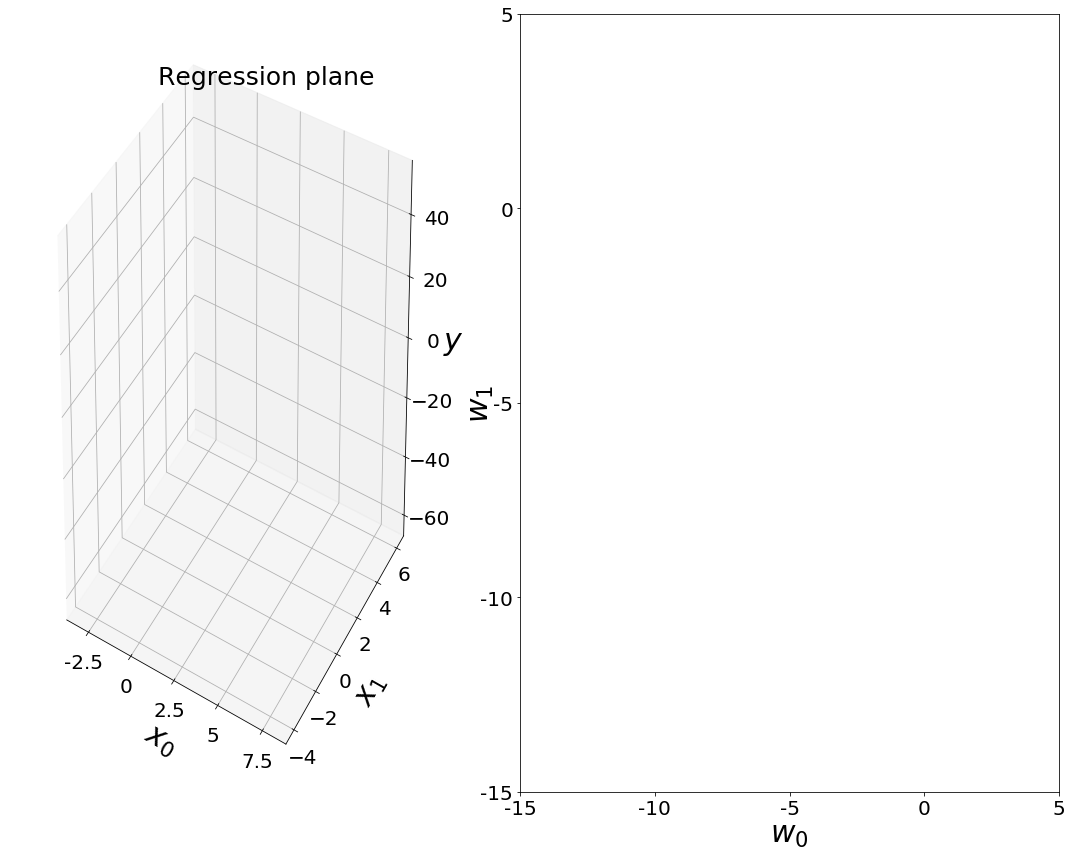

In [10]:
levels = np.array([80,150,300,600,2000])
labelsize_=20 # set tick label font size 
fontsize_=30

fig = plt.figure(figsize=(15,12)) # set fig size
fig.suptitle('Regression plane', fontsize=25,x=0.25, y=0.92)
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1.2 ]) 

ax0=fig.add_subplot(gs[0], projection="3d")
ax0.tick_params(axis='both', which='major', labelsize=labelsize_)
ax0.set_xlabel(r'$x_0$', fontsize=fontsize_, labelpad=12)
ax0.set_xticks([-2.5,0,2.5,5,7.5]) 
ax0.set_xticklabels(["-2.5","0","2.5","5","7.5"], fontsize=labelsize_)
ax0.set_ylabel(r'$x_1$', fontsize=fontsize_, labelpad=15)
ax0.set_zlabel(r'$y$', fontsize=fontsize_, labelpad=23)
ax0.tick_params(axis='both', which='major', labelsize=labelsize_)  
ax0.tick_params(axis='z', pad=16, which='major', labelsize=labelsize_) 
ax1=fig.add_subplot(gs[1])
ax1.tick_params(axis='both', which='major', labelsize=labelsize_) 
ax1.set_xlabel(r'$w_0$', fontdict=None, labelpad=2, fontsize=fontsize_)
ax1.set_ylabel(r'$w_1$', fontdict=None, labelpad=-16, fontsize=fontsize_)
ax1.set_xticks([-15,-10,-5,0,5]) 
ax1.set_xticklabels(["-15","-10","-5","0","5"], fontsize=labelsize_)
ax1.set_yticks([-15,-10,-5,0,5]) 
ax1.set_yticklabels(["-15","-10","-5","0","5"], fontsize=labelsize_)

camera = Camera(fig)
for i in points_:
    w=np.array([[w0[i],w1[i]]])
    b_= b_fixed
    cl_=cl[i]
    ax0.legend([f'epochs: {i}'], loc=(0.1, 0.78), fontsize=19) 
    ax1.legend([f'costs: {np.round(c[i],1)}'], loc=(0.55, 0.03), fontsize=19)
    zs = np.array([pred_meshgrid(np.array([[wp0,wp1]]),w, np.array([[b_]])) 
                   for wp0, wp1 in zip(np.ravel(M1), np.ravel(M2))])
    Z = zs.reshape(M1.shape)
    
    ax0.plot_surface(M1, M2, Z, rstride=1, cstride=1,  alpha=0.25,cmap=cm.plasma, label=str(i),
                    antialiased=False) 
    ax0.scatter(x_train.T[0],x_train.T[1] ,   y_train, marker="x", s=12**2, color="black")
    for j in range(6):    
        x,y,z = [x_train[j][0],x_train[j][0]],[x_train[j][1],x_train[j][1]],[float(y_train[j]),cl_[j]]
        ax0.scatter(x,y,z, color='black',s=0.5)
        ax0.plot(x,y,z, color='black', linewidth=1.5,linestyle='dashed')
    cp = ax1.contour(N1, N2, Z_2,levels, colors='black', 
                     linestyles='dashed', linewidths=1)
    plt.clabel(cp, inline=1,fmt='%1.1f', fontsize=15 )
    cp = plt.contourf(N1, N2, Z_2, alpha=0.85,cmap=cm.viridis) 
    plt.scatter(w0[i],w1[i],marker='o', s=10**2, color='orange' )
    plt.plot(w0[0:i],w1[0:i], linestyle="dashed", color='orange' )
    plt.tight_layout()
    camera.snap()

animation = camera.animate(interval = 100,   
                          repeat = False, repeat_delay = 0)
animation.save('multilinreg_2_large.gif', writer = 'imagemagick') 

print("w0: " + str(w0[i])) 
print("w1: " + str(w1[i])) 
print("costs: " + str(c[i]))

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


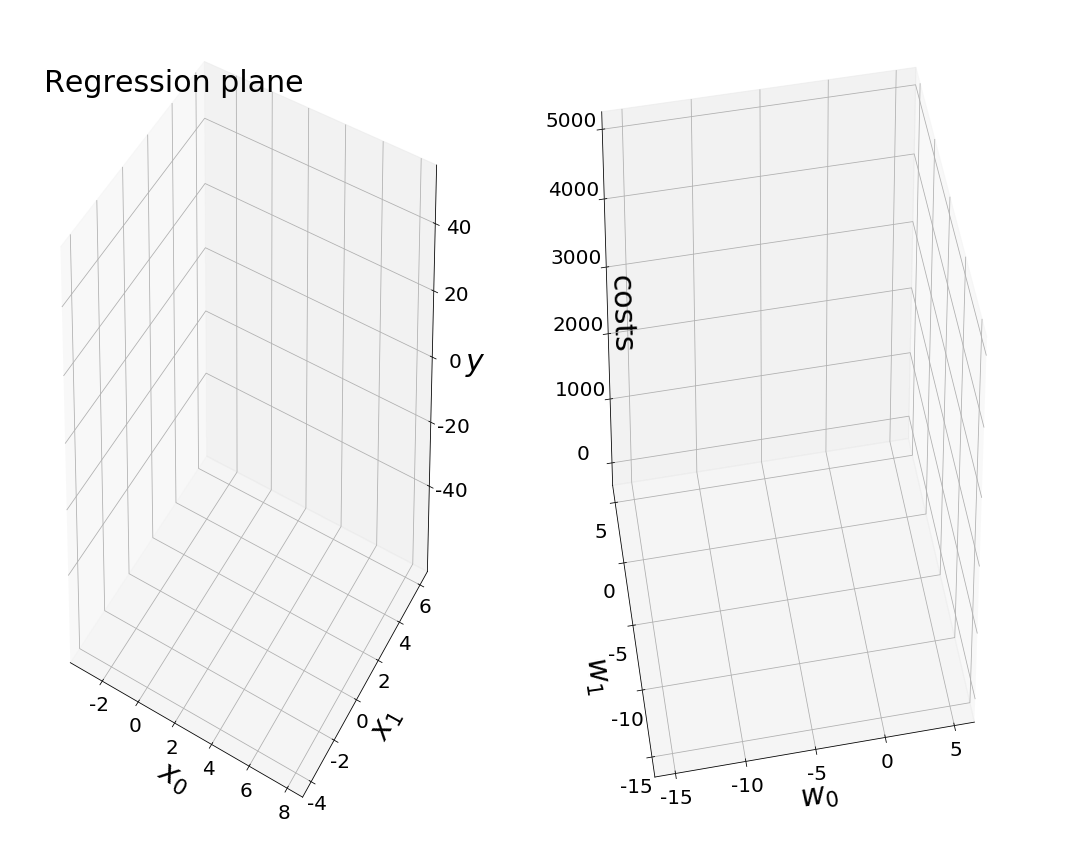

In [11]:
labelsize_=20 # set tick label font size 
fontsize_=30

fig = plt.figure(figsize=(15,12)) # set fig size
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1.2 ]) 

ax0=fig.add_subplot(gs[0], projection="3d") 
ax0.set_title('Regression plane', fontsize=fontsize_,x=0.35, y=0.97)
ax0.set_xlabel(r'$x_0$', fontsize=fontsize_, labelpad=6)
ax0.set_ylabel(r'$x_1$', fontsize=fontsize_, labelpad=8)
ax0.set_zlabel(r'$y$', fontsize=fontsize_, labelpad=21)
ax0.tick_params(axis='x', pad=0, which='major', labelsize=labelsize_)
ax0.tick_params(axis='y', pad=0, which='major', labelsize=labelsize_)
ax0.tick_params(axis='z', pad=14, which='major', labelsize=labelsize_)
ax0.set_xticks([-2,0,2,4,6,8]) 
ax0.set_xticklabels(["-2","0","2","4","6","8"], fontsize=labelsize_)
ax0.set_yticks([-4,-2,0,2,4,6]) 
ax0.set_yticklabels(["-4","-2","0","2","4","6"], fontsize=labelsize_)
ax0.set_zticks([-40,-20,0,20,40]) 
ax0.set_zticklabels(["-40","-20","0","20","40"], fontsize=labelsize_)

ax1=fig.add_subplot(gs[1], projection="3d") 
ax1.view_init(elev=37., azim=-100)
ax1.set_xlabel(r'$w_0$', fontdict=None, labelpad=5, fontsize=fontsize_)
ax1.set_ylabel(r'$w_1$', fontdict=None, labelpad=24, fontsize=fontsize_)
ax1.set_zlabel("costs", fontdict=None, labelpad=-35, fontsize=fontsize_)
ax1.tick_params(axis='x', pad=0, which='major', labelsize=labelsize_)
ax1.tick_params(axis='y', pad=10, which='major', labelsize=labelsize_)
ax1.tick_params(axis='z', pad=24, which='major', labelsize=labelsize_)
ax1.set_xticks([-15,-10,-5,0,5]) 
ax1.set_xticklabels(["-15","-10","-5","0","5"], fontsize=labelsize_)
ax1.set_yticks([-15,-10,-5,0,5]) 
ax1.set_yticklabels(["-15","-10","-5","0","5"], fontsize=labelsize_)
ax1.set_zticks([0,1000,2000,3000,4000,5000]) 
ax1.set_zticklabels(["0","1000","2000","3000","4000", "5000"], fontsize=labelsize_)

camera = Camera(fig)
for i in points_:
    w=np.array([[w0[i],w1[i]]])
    b_= b_fixed
    cl_=cl[i]
    ax0.legend([f'epochs: {i}'], loc=(0.05, 0.82), fontsize=labelsize_) 
    ax1.legend([f'costs: {np.round(c[i],1)}'], loc=(0.2, 0.8), fontsize=labelsize_)
    zs = np.array([pred_meshgrid(np.array([[wp0,wp1]]),w, np.array([[b_]])) 
                   for wp0, wp1 in zip(np.ravel(M1), np.ravel(M2))])
    Z = zs.reshape(M1.shape)
    ax0.plot_surface(M1, M2, Z, rstride=1, cstride=1, color='blue',
                     alpha=0.25,cmap=cm.plasma, label=str(i),
                     antialiased=False)
    ax0.scatter(x_train.T[0],x_train.T[1],y_train,
                marker="x", s=12**2, color="black")
    for j in range(6):    
        x,y,z = [x_train[j][0],x_train[j][0]],[x_train[j][1],x_train[j][1]],[float(y_train[j]),cl_[j]]
        ax0.scatter(x,y,z, color='black',s=0.5)
        ax0.plot(x,y,z, color='black', linewidth=1.5,linestyle='dashed')
        
    ax1.plot(w0[0:i],w1[0:i],c[0:i], linestyle="dashed", 
                color="black", label=str(i)) 
    ax1.plot_surface(N1, N2, Z_2, cmap='viridis',rstride=1, 
                    cstride=1, antialiased=True, alpha=0.69)
    ax1.scatter(w0[i],w1[i],c[i],marker='o', s=12**2,
               color="black", alpha=1.0 )
    plt.tight_layout()
    camera.snap()

animation = camera.animate(interval = 100,
                          repeat = False, repeat_delay = 0)
animation.save('multilinreg_3_large.gif', writer = 'imagemagick') 